In [1]:
# Importing the libraries needed
from math import pi, sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# declaring the radius to surface sample in cm
r = 1
a = pi*(r**2)

In [3]:
def une_duplicatas(lista1, lista2):
    """
    input:
    list of values
    
    output:
    return list with the mean between the values of the two lists
    """
    lista = []
    for x, y in zip(lista1, lista2):
        mean = round((x+y)/2, 3)
        lista.append(mean)
    return lista

In [4]:
# listing the values of each sample
rec_1 = [2.828, 3.578, 3.633, 3.661, 3.672, 3.674]
rec_2 = [2.272, 3.337, 3.424, 3.446, 3.496, 3.524]
lab_1 = [2.873, 3.659, 3.782, 3.823, 3.849, 3.908]
lab_2 = [2.851, 3.595, 3.718, 3.749, 3.788, 3.849]

rec = une_duplicatas(rec_1, rec_2)
lab = une_duplicatas(lab_1,lab_2)

In [5]:
# storing the samples in a dictionary
simulacao_1 = {'rec': rec, 
               'lab': lab, 
               }

This is storage makes de processing easier and better to work with.

In [6]:
lista_gm = []
lista_gm2 = []
for i in simulacao_1.values():
    aux= i
    for x, y in enumerate(aux):
        limite = len(aux)-1
        if x < limite:
            test = round((aux[x+1] - aux[x]), 3)
            gm = round(test/a, 8)
            gm_2 = round(gm**2, 8)
            lista_gm.append(gm)
            lista_gm2.append(gm_2)

* This implementation was used to calculate de mass gain based of this equation $ \left ( \frac{\Delta m}{cm} \right ) ^{2}  = kpt $  
* lista_gm is the square root of the mass gain.
* lista_gm2 is the mass gain.

In [7]:
def insere_zero(lista):
    """
    insert one zero in te begining of a list
    
    input:
    list of values
    
    output:
    list with a zero in the begining
    """
    for x, y in enumerate(lista):
        lista[x].insert(0, 0.0)
    return lista

In [8]:
chunks_gm = [lista_gm[x:x+5] for x in range(0, len(lista_gm), 5)] #it splits lista_gm into two lists refered to each sample
chunks_gm2 = [lista_gm2[x:x+5] for x in range(0, len(lista_gm2), 5)] #it splits lista_gm2 into two lists refered to each sample

chunks_gm = insere_zero(chunks_gm)
chunks_gm2 = insere_zero(chunks_gm2)

In [9]:
# turning the storing the new data into a dictionary so that we can proceed it to pandas
dados_calc ={
    'rec_gm': chunks_gm[0],
    'rec_gm2': chunks_gm2[0],
    'lab_gm': chunks_gm[1],
    'lab_gm2': chunks_gm2[1]
}

In [10]:
df = pd.DataFrame(simulacao_1) # dataframe: raw data
df_calc = pd.DataFrame(dados_calc) # dataframe: calculated data 

df_simulacao = pd.concat([df, df_calc], axis=1) #dataframe: both dfs concatenated

In [11]:
df_simulacao['tempo'] =  [x for x in range(0, 60, 10)] # now we add the time variable to our dataset

In [12]:
df_simulacao.head(6) # checking our dataset

,rec,lab,rec_gm,rec_gm2,lab_gm,lab_gm2,tempo
0,2.550,2.862,0.000000,0.000000,0.000000,0.000000,0
1,3.458,3.627,0.289025,0.083536,0.243507,0.059296,10
2,3.529,3.750,0.022600,0.000511,0.039152,0.001533,20
3,3.554,3.786,0.007958,0.000063,0.011459,0.000131,30
4,3.584,3.819,0.009549,0.000091,0.010504,0.000110,40
5,3.599,3.878,0.004775,0.000023,0.018780,0.000353,50


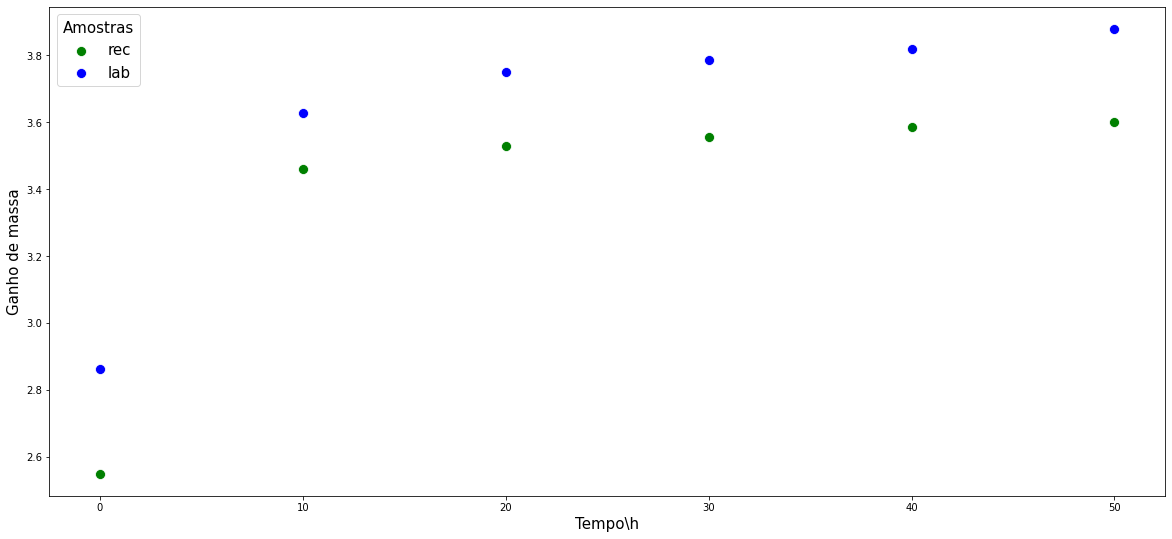

In [13]:
#ploting the mass over time for the first sample 
plt.figure(figsize=(20, 9))
sns.scatterplot(data= df_simulacao, x='tempo', y='rec', color='green', s=100)
sns.scatterplot(data= df_simulacao, x='tempo', y='lab', color='blue', s=100)
plt.ylabel(r'Ganho de massa', {'fontsize':15})
plt.xlabel('Tempo\h', {'fontsize': 15})
plt.legend(['rec', 'lab'], title='Amostras', fontsize=15, title_fontsize=15)
plt.text(0, 0, '')
plt.show()

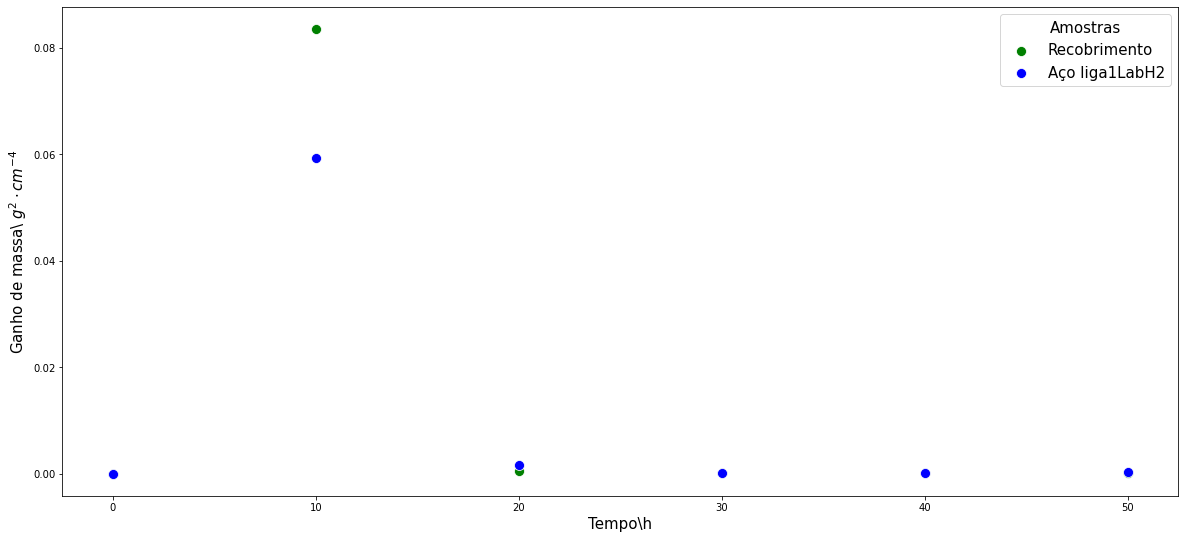

In [29]:
#plotting the mass gain over time and comparing the samples
plt.figure(figsize=(20, 9))
sns.scatterplot(data= df_simulacao, x='tempo', y='rec_gm2', color='green', s=100)
sns.scatterplot(data= df_simulacao, x='tempo', y='lab_gm2', color='blue', s=100)
plt.ylabel(r'Ganho de massa\ $g^2\cdot cm^{-4} $', {'fontsize':15})
plt.xlabel('Tempo\h', {'fontsize': 15})
plt.legend(['Recobrimento', 'Aço liga1LabH2'], title='Amostras', fontsize=15, title_fontsize=15)
plt.text(0, 0, '')
plt.show()

Her we can see that the mass gain had a peak at 10 hours of experiment then it decreased and stabilized.

# **Modeling the experiment for 1000 hours**

### To find the oxidation kinetic constant for the experimental data, I had to make the following assumptions: ##

* For the mass gain of the coating I chose to exclude the first three data and treat the last data as an outlier, since, we have no further data to say that the coating will follow the tendency to further decrease its oxidation kinetics. So, I chose to use the points for 30 and 40 hours to fit the curve using the polyfit function of the library numpy with a polynomial of degree 1 given the kp equation being: $ \left ( \frac{\Delta m}{cm} \right ) ^{2}  = kpt $ . Being the units of the constant in: $ g^2\cdot cm^{-4} $  


* As for the laboratory sample, it was observed that after 30 hours of experiment the oxidation kinetics seems to have stabilized, and then the curve was fitted using the points for the 30 to 50 hour times using the polynomial fit function. in the same way as for the cover sample.

In [15]:
df_simulacao['rec_gm2'][3:] # we will use only the last three values of the sample

3    0.000063
4    0.000091
5    0.000023
Name: rec_gm2, dtype: float64

In [16]:
t = 3600 # turning the time variable into seconds 

In [17]:

lista_rec = np.array(df_simulacao['rec_gm2'][3:5]) # we will use only the last two values of the sample
tempo_rec = np.array([i*t for i in df_simulacao['tempo'][3:5]])

kp_rec, ct_rec = np.polyfit(tempo_rec, lista_rec, 1) # calculating the knectics constant for the sample
kp_rec

7.738888888888883e-10

In [18]:
lista_lab = np.array(df_simulacao['lab_gm2'][3:]) # we will use only the last three values of the sample
tempo_lab = np.array([i*t for i in df_simulacao['tempo'][3:]])

kp_lab, ct_lab = np.polyfit(tempo_lab, lista_lab, 1) # calculating the knectics constant for the sample
kp_lab 

3.074861111111112e-09

In [20]:
def simula_pontos(z1, kp, tempo = 3600, l=50, m=1050, n=50):
    """
    it simulates new values according to a knectics constant in a chosen range of time
    
    input:
    z1: list of values
    kp: knectics constant
    tempo: time in seconds
    l: start time
    m: end time
    n: time step
    
    output:
    novos_pontos: list with the new values
    novos_tempos: list with the new values for time
    """
    novo_tempo = [l] # l  tempo inicial
    novos_pontos = [z1] # z1 massa inicial
    for i in range(l*2, m, n): # m tempo final da simulação, n passo da simulação
        z2 = round(sqrt(kp*i*tempo*a) + z1, 5)  
        novos_pontos.append(z2)
        novo_tempo.append(i)
    return novos_pontos, novo_tempo

In [21]:
# modeling and finding the new values
pontos_rec, tempos_rec = simula_pontos(df_simulacao['rec_gm'][5], kp_rec)
pontos_lab, tempos_lab = simula_pontos(df_simulacao['lab_gm'][5], kp_lab)

In [22]:
dados_simul = pd.DataFrame({'rec_gm':pontos_rec, 'lab_gm': pontos_lab}) # creating a new table with the simulated values

dados_simul['tempo'] = tempos_lab

In [23]:
dados_simul.head()

,rec_gm,lab_gm,tempo
0,0.004775,0.01878,50
1,0.034360,0.07775,100
2,0.041010,0.09100,150
3,0.046610,0.10218,200
4,0.051550,0.11202,250


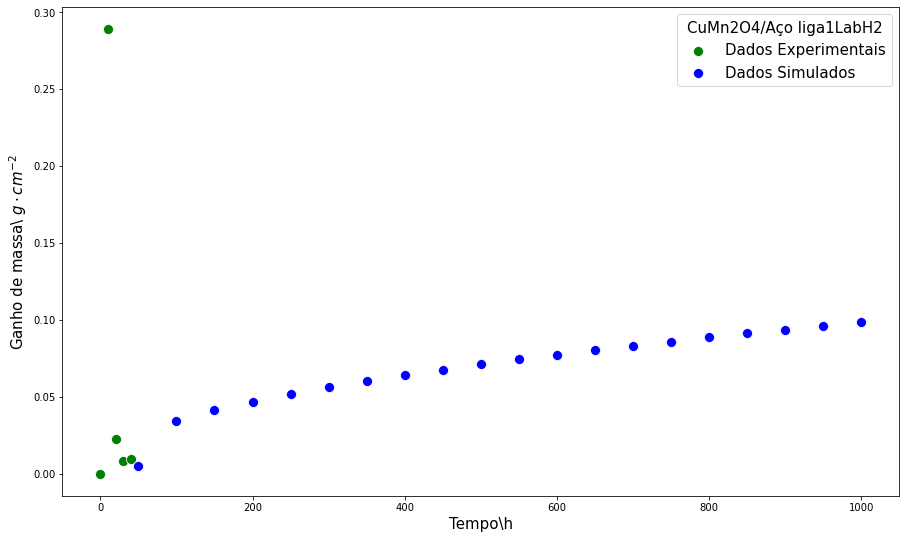

In [31]:
# plotting and comparing the experimental data with the simulated ones
plt.figure(figsize=(15, 9))
sns.scatterplot(data= df_simulacao, x='tempo', y='rec_gm', color='green', s=100)
sns.scatterplot(data= dados_simul, x='tempo', y='rec_gm', color='blue', s=100)
#sns.scatterplot(data= df_simulacao, x='tempo', y='a304_gm', color='black', s=100)
#sns.scatterplot(data= df_gm, x='tempo', y='lab_2_gm', color='red', s=100)
plt.ylabel(r'Ganho de massa\ $g\cdot cm^{-2} $', {'fontsize':15})
plt.xlabel('Tempo\h', {'fontsize': 15})
plt.legend(['Dados Experimentais', 'Dados Simulados'], title='CuMn2O4/Aço liga1LabH2', fontsize=15, title_fontsize=15)
plt.text(0, 0, '')
plt.show()

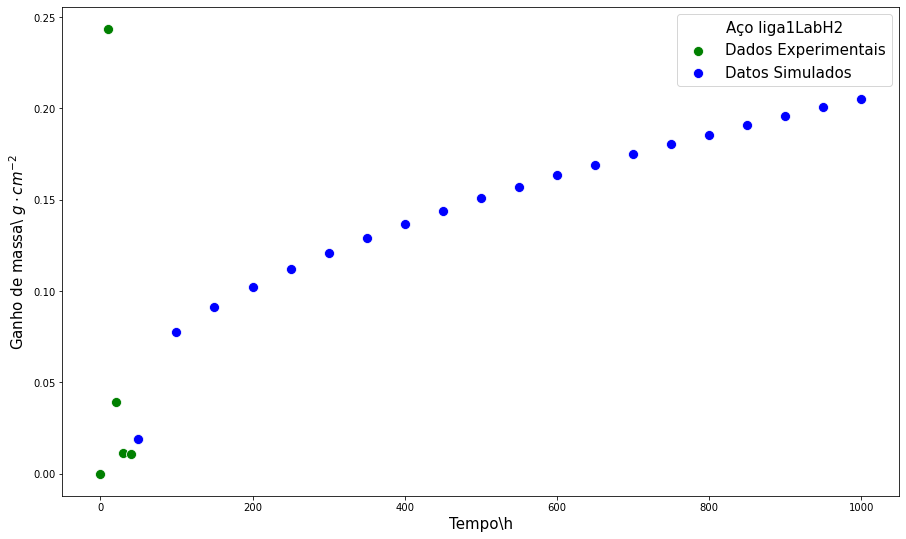

In [32]:
# plotting and comparing the experimental data with the simulated ones
plt.figure(figsize=(15, 9))
sns.scatterplot(data= df_simulacao, x='tempo', y='lab_gm',markers='s', color='green', s=100)
sns.scatterplot(data= dados_simul, x='tempo', y='lab_gm', markers= 'v', color='blue', s=100)
#sns.scatterplot(data= df_simulacao, x='tempo', y='a304_gm', color='black', s=100)
#sns.scatterplot(data= df_gm, x='tempo', y='lab_2_gm', color='red', s=100)
plt.ylabel(r'Ganho de massa\ $g\cdot cm^{-2} $', {'fontsize':15})
plt.xlabel('Tempo\h', {'fontsize': 15})
plt.legend(['Dados Experimentais', 'Datos Simulados'], title='Aço liga1LabH2', fontsize=15, title_fontsize=15)
plt.text(0, 0, '')
plt.show()

### This would be the data behavior for 1000 hours of experiment according to the assumptions made.###

### Conclusions:###

* The oxidation kinetics constants for the coating and labH2 steel (sample 1) were respectively $7.39 \cdot 10^{-10}$ e $3.08 \cdot 10^{-9}$ showing that the coating (sample 2).

* For covering. If the data follow the trend of mass gain in 50 hours the ratio between the oxidation kinetics of the coated steel and labH2 steel will be even greater.

* From this simulation, it is possible to see that the steel coating helped considerably reduce the oxidation kinetics when compared to the non-covered steel.